In [36]:
#ff_file_path = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_16567.txt'
ff_file_path = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/ff4.txt'
ff_file_path_2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/ff5.txt'
ff_file_path_3 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/ff6.txt'

In [37]:
# Function to parse the FastFlow execution file
def parse_fastflow_file(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    
    compression_results = {}
    decompression_results = {}
    
    for i, line in enumerate(lines):
        if 'decompression' in line:
            l = int(line.split('-l')[1].split()[0])
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            if l not in decompression_results:
                decompression_results[l] = []
            decompression_results[l].append((w, time))
        
        elif 'compression' in line:
            l = int(line.split('-l')[1].split()[0])
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            if l not in compression_results:
                compression_results[l] = []
            compression_results[l].append((w, time))
    
    return compression_results, decompression_results

# Example usage
compression_results1, decompression_results1 = parse_fastflow_file(ff_file_path)
compression_results2, decompression_results2 = parse_fastflow_file(ff_file_path_2)
compression_results3, decompression_results3 = parse_fastflow_file(ff_file_path_3)


In [38]:
print(compression_results1)

{1: [(1, 7214.6), (2, 3935.4), (4, 2342.4), (8, 1619.2), (13, 1237.4), (14, 1269.7), (15, 1218.3), (16, 1282.4), (20, 1344.2), (22, 1210.2), (24, 1175.3), (26, 1133.6), (27, 1147.6), (28, 1165.7), (29, 1142.9), (30, 1169.1), (31, 1141.2), (32, 1221.5)], 2: [(1, 7157.1), (2, 3964.8), (4, 2336.0), (8, 1608.6), (13, 1288.4), (14, 1231.5), (15, 1235.9), (16, 1283.7), (20, 1354.7), (22, 1206.1), (24, 1145.0), (26, 1193.0), (27, 1166.7), (28, 1183.0), (29, 1143.1), (30, 1148.7), (31, 1167.2), (32, 1221.5)], 4: [(1, 7144.9), (2, 3954.6), (4, 2406.5), (8, 1508.6), (13, 1295.8), (14, 1258.9), (15, 1211.4), (16, 1278.7), (20, 1313.4), (22, 1239.1), (24, 1161.9), (26, 1183.4), (27, 1173.5), (28, 1203.7), (29, 1189.3), (30, 1144.5), (31, 1160.1), (32, 1264.0)], 8: [(1, 7150.8), (2, 3925.2), (4, 2401.0), (8, 1560.7), (13, 1255.8), (14, 1264.9), (15, 1278.9), (16, 1353.9), (20, 1350.0), (22, 1274.3), (24, 1179.2), (26, 1183.1), (27, 1224.0), (28, 1183.6), (29, 1236.5), (30, 1179.4), (31, 1178.9), (3

In [39]:
average_compression_results = {}

for l in compression_results1:
    average_compression_results[l] = []
    for i in range(len(compression_results1[l])):
        average_compression_results[l].append((compression_results1[l][i][0], (compression_results1[l][i][1] + compression_results2[l][i][1] + compression_results3[l][i][1])/3))


In [40]:
print('Compression results:')
for l in average_compression_results:
    print(f'l = {l}')
    for w, time in average_compression_results[l]:
        print(f'w = {w}, time = {time}')
    print()

Compression results:
l = 1
w = 1, time = 7201.0
w = 2, time = 3954.2333333333336
w = 4, time = 2348.7666666666664
w = 8, time = 1603.1666666666667
w = 13, time = 1243.6
w = 14, time = 1261.4333333333334
w = 15, time = 1224.2666666666667
w = 16, time = 1289.8666666666668
w = 20, time = 1328.8
w = 22, time = 1200.2333333333333
w = 24, time = 1196.1000000000001
w = 26, time = 1155.4
w = 27, time = 1160.2666666666667
w = 28, time = 1190.3666666666666
w = 29, time = 1153.3333333333333
w = 30, time = 1157.2333333333333
w = 31, time = 1149.3999999999999
w = 32, time = 1255.9333333333334

l = 2
w = 1, time = 7157.900000000001
w = 2, time = 3987.066666666667
w = 4, time = 2358.2666666666664
w = 8, time = 1597.6333333333332
w = 13, time = 1274.8
w = 14, time = 1251.3666666666666
w = 15, time = 1229.1666666666667
w = 16, time = 1281.6
w = 20, time = 1353.2333333333333
w = 22, time = 1201.3333333333333
w = 24, time = 1175.3333333333333
w = 26, time = 1162.9333333333334
w = 27, time = 1194.1
w = 28

In [41]:
sequential_time_comp = 6725

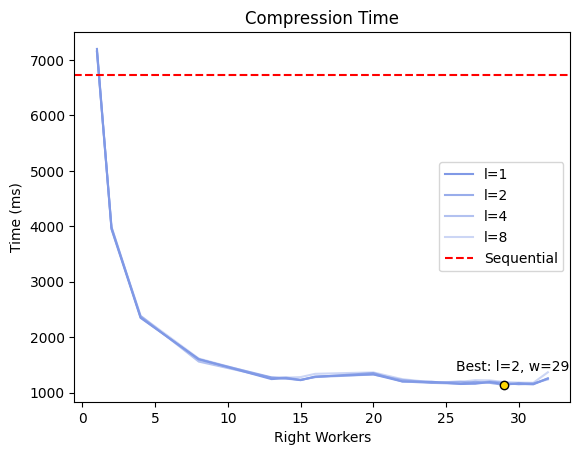

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define a base color (grey)
base_color = np.array([0.5, 0.6, 0.9])  # RGB for grey

# Function to adjust the opacity of the base color
def adjust_opacity(color, opacity):
    return np.append(color, opacity)

# Plotting the compression results
fig, ax = plt.subplots()

# Variables to track the best point
best_time = float('inf')
best_l = None
best_w = None

for i, (l, results) in enumerate(average_compression_results.items()):
    ws, times = zip(*results)
    opacity = 1 - (i * 0.2)  # Adjust opacity for each l
    color_with_opacity = adjust_opacity(base_color, opacity)
    ax.plot(ws, times, label=f"l={l}", color=color_with_opacity)
    
    # Find the best point
    min_time = min(times)
    if min_time < best_time:
        best_time = min_time
        best_l = l
        best_w = ws[times.index(min_time)]

# Highlight the best point
ax.scatter(best_w, best_time, color='gold', edgecolor='black', zorder=5)
ax.annotate(f"Best: l={best_l}, w={best_w}", (best_w, best_time), textcoords="offset points", xytext=(6,10), ha='center')

ax.axhline(y=sequential_time_comp, color='r', linestyle='--', label='Sequential')

ax.set_xlabel("Right Workers")
ax.set_ylabel("Time (ms)")
ax.set_title("Compression Time")
ax.legend()
plt.show()

In [43]:
average_compression_results

{1: [(1, 7201.0),
  (2, 3954.2333333333336),
  (4, 2348.7666666666664),
  (8, 1603.1666666666667),
  (13, 1243.6),
  (14, 1261.4333333333334),
  (15, 1224.2666666666667),
  (16, 1289.8666666666668),
  (20, 1328.8),
  (22, 1200.2333333333333),
  (24, 1196.1000000000001),
  (26, 1155.4),
  (27, 1160.2666666666667),
  (28, 1190.3666666666666),
  (29, 1153.3333333333333),
  (30, 1157.2333333333333),
  (31, 1149.3999999999999),
  (32, 1255.9333333333334)],
 2: [(1, 7157.900000000001),
  (2, 3987.066666666667),
  (4, 2358.2666666666664),
  (8, 1597.6333333333332),
  (13, 1274.8),
  (14, 1251.3666666666666),
  (15, 1229.1666666666667),
  (16, 1281.6),
  (20, 1353.2333333333333),
  (22, 1201.3333333333333),
  (24, 1175.3333333333333),
  (26, 1162.9333333333334),
  (27, 1194.1),
  (28, 1175.8999999999999),
  (29, 1138.6666666666667),
  (30, 1173.8333333333333),
  (31, 1157.5333333333333),
  (32, 1256.0666666666666)],
 4: [(1, 7146.7),
  (2, 3952.366666666667),
  (4, 2382.4666666666667),
  (8, 1

In [44]:
#calculate speedup, scalability and efficiency for compression_results. for the scalability consider l=1 and w=1 as the reference.

sequential_time_comp = 6725

speedup = []
scalability = []
efficiency = []

for results in average_compression_results[2]:
        speedup.append(sequential_time_comp / results[1])
        scalability.append(average_compression_results[1][0][1] / results[1])
        efficiency.append(sequential_time_comp / results[1] / results[0])

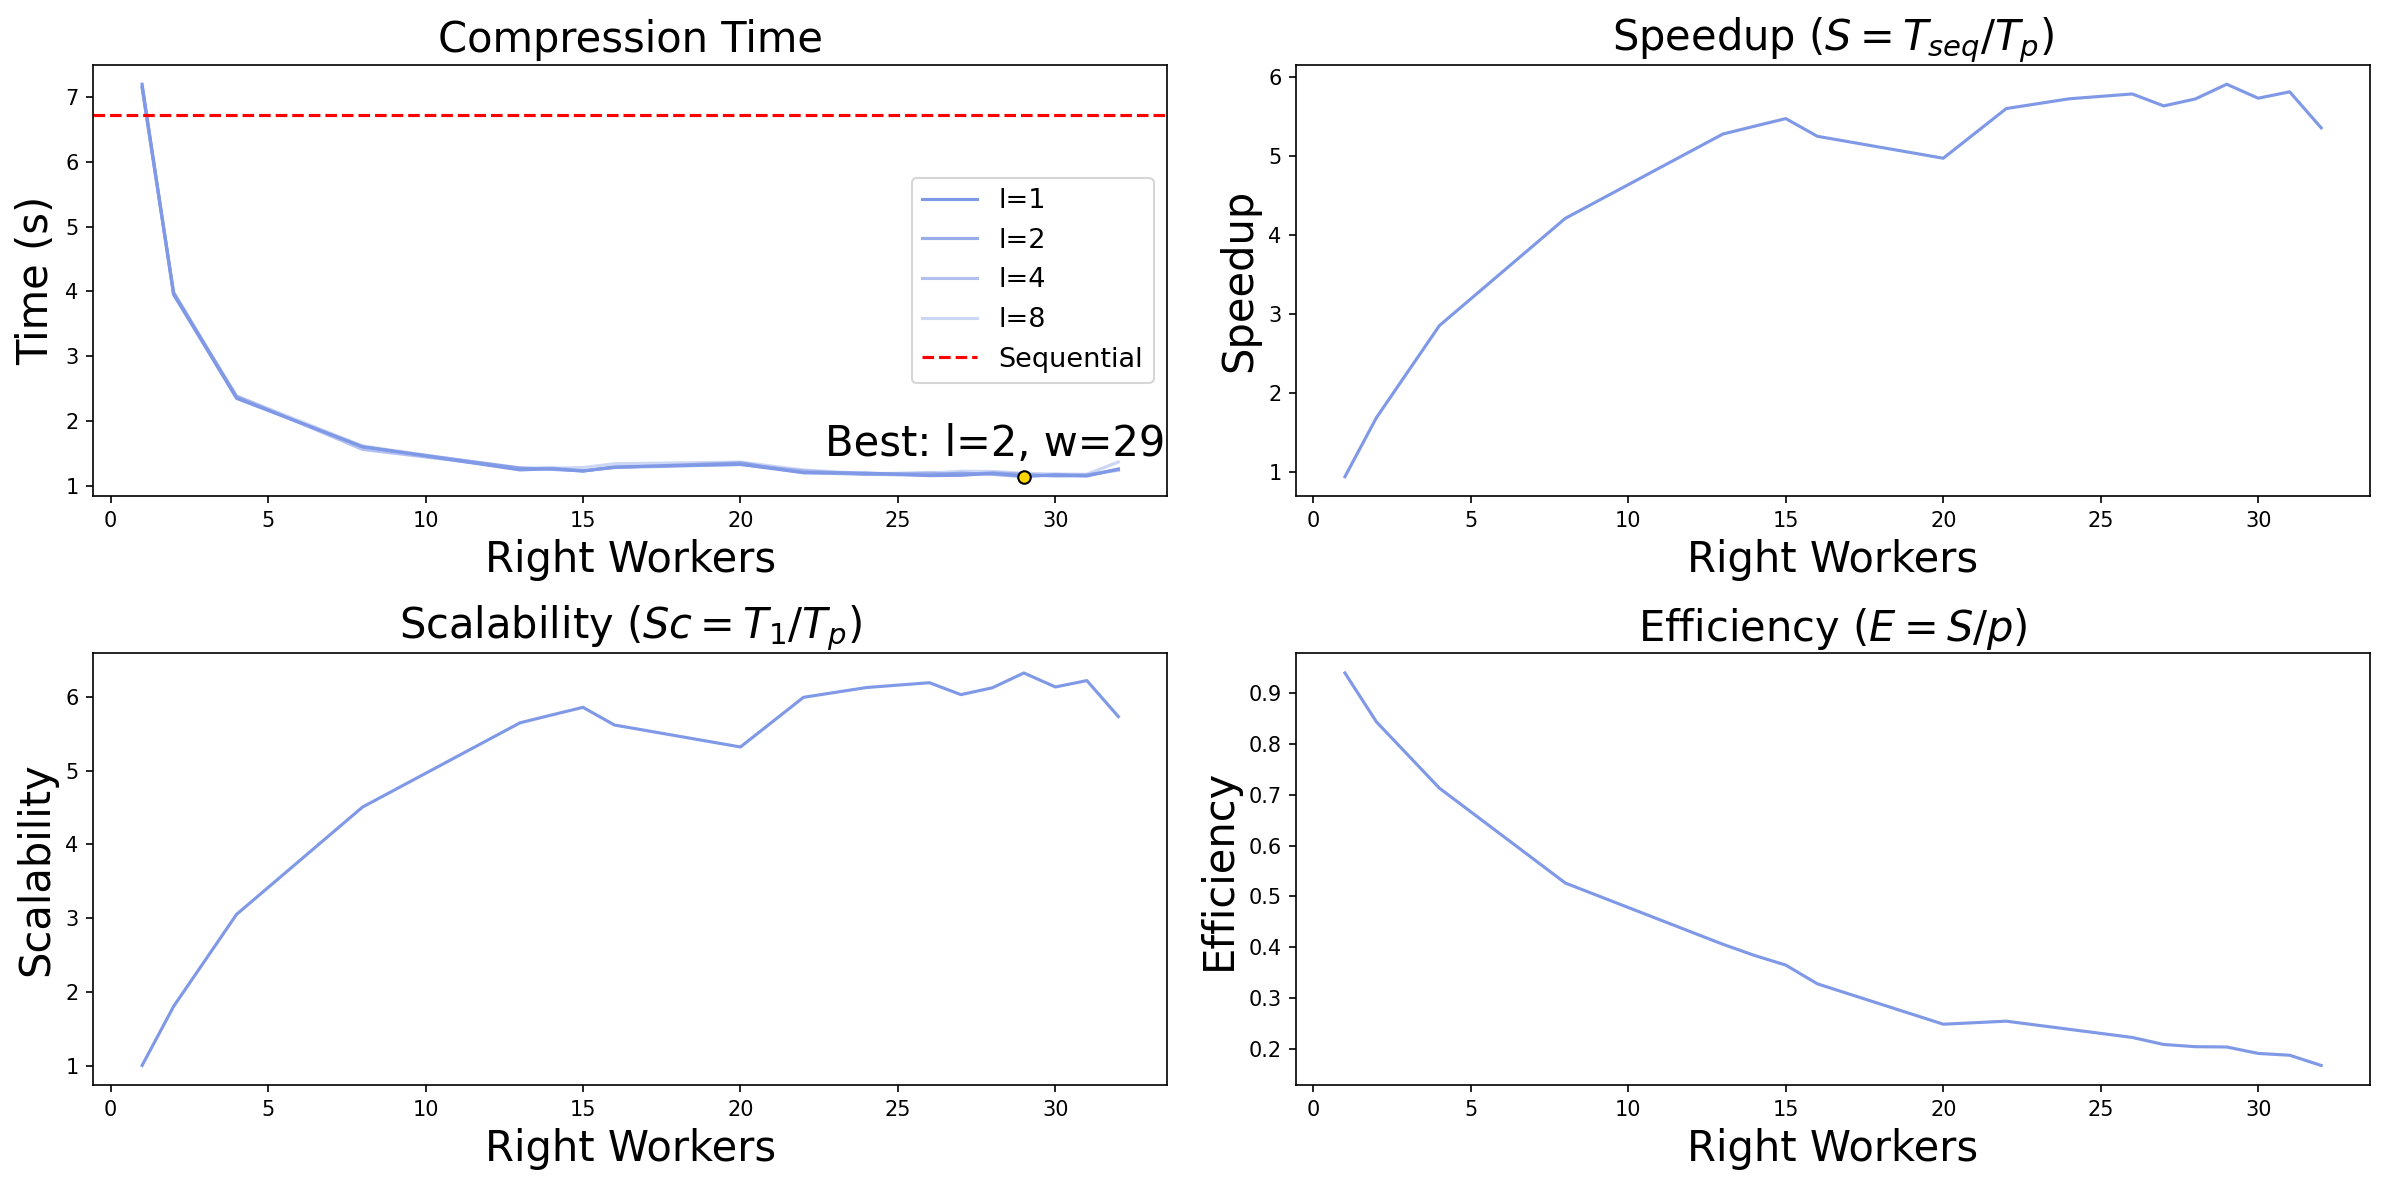

In [45]:
import matplotlib.pyplot as plt

# Assuming compression_results, speedup, scalability, efficiency, base_color, and adjust_opacity are defined

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=150)  # Adjusted figsize to make the plot more flat and rectangular

# Compression time plot
axs[0, 0].set_title("Compression Time", fontsize=20)
axs[0, 0].set_xlabel("Right Workers", fontsize=20)
axs[0, 0].set_ylabel("Time (s)", fontsize=20)  # Changed to seconds

best_time = float('inf')
best_l = None
best_w = None

for i, (l, results) in enumerate(average_compression_results.items()):
    ws, times = zip(*results)
    times_in_seconds = [t / 1000 for t in times]  # Convert milliseconds to seconds
    opacity = 1 - (i * 0.2)  # Adjust opacity for each l
    color_with_opacity = adjust_opacity(base_color, opacity)
    axs[0, 0].plot(ws, times_in_seconds, label=f"l={l}", color=color_with_opacity)
    
    # Find the best point
    min_time = min(times_in_seconds)
    if min_time < best_time:
        best_time = min_time
        best_l = l
        best_w = ws[times_in_seconds.index(min_time)]

# Highlight the best point
axs[0, 0].scatter(best_w, best_time, color='gold', edgecolor='black', zorder=5)
axs[0, 0].annotate(f"Best: l={best_l}, w={best_w}", (best_w, best_time), textcoords="offset points", xytext=(-14,10), ha='center', fontsize=20)

axs[0, 0].axhline(y=sequential_time_comp / 1000, color='r', linestyle='--', label='Sequential')  # Convert to seconds
axs[0, 0].legend(fontsize=13)

# Speedup plot
axs[0, 1].set_title("Speedup ($S = T_{seq} / T_p$)", fontsize=20)
axs[0, 1].set_xlabel("Right Workers", fontsize=20)
axs[0, 1].set_ylabel("Speedup", fontsize=20)

axs[0, 1].plot([results[0] for results in average_compression_results[2]], speedup, color=base_color)

# Scalability plot
axs[1, 0].set_title("Scalability ($Sc = T_1 / T_p$)", fontsize=20)
axs[1, 0].set_xlabel("Right Workers", fontsize=20)
axs[1, 0].set_ylabel("Scalability", fontsize=20)

axs[1, 0].plot([results[0] for results in average_compression_results[2]], scalability, color=base_color)

# Efficiency plot
axs[1, 1].set_title("Efficiency ($E = S / p$)", fontsize=20)
axs[1, 1].set_xlabel("Right Workers", fontsize=20)
axs[1, 1].set_ylabel("Efficiency", fontsize=20)

axs[1, 1].plot([results[0] for results in average_compression_results[2]], efficiency, color=base_color)

plt.tight_layout()
plt.show()

# weak scaling

In [46]:
ff_weak1 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/ffweak1.txt'
ff_weak2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/ffweak2.txt'
ff_weak3 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/ffweak3.txt'

In [47]:
seq_weak1 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/seq/seqweak1.txt'
seq_weak2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/seq/seqweak2.txt'
seq_weak3 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/seq/seqweak3.txt'

In [48]:
def parse_weak_scaling_file(filepath):

    with open(filepath, 'r') as file:
        lines = file.readlines()
    
    compression_results = []
    decompression_results = []
    
    for i, line in enumerate(lines):
        if 'decompression' in line:
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            decompression_results.append((w, time))
        
        elif 'compression' in line:
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            compression_results.append((w, time))
    
    return compression_results, decompression_results

compression_results_weak1, decompression_results_weak1 = parse_weak_scaling_file(ff_weak1)
compression_results_weak2, decompression_results_weak2 = parse_weak_scaling_file(ff_weak2)
compression_results_weak3, decompression_results_weak3 = parse_weak_scaling_file(ff_weak3)

comp_seq_weak1, decomp_seq_weak1 = parse_weak_scaling_file(seq_weak1)
comp_seq_weak2, decomp_seq_weak2 = parse_weak_scaling_file(seq_weak2)
comp_seq_weak3, decomp_seq_weak3 = parse_weak_scaling_file(seq_weak3)


In [49]:
print(compression_results_weak1)

[(1, 223.4), (2, 240.6), (4, 331.3), (8, 452.3), (16, 639.3), (20, 732.6), (22, 778.6), (24, 869.5), (26, 999.4), (28, 921.4)]


In [50]:
print(decompression_results_weak1)

[(1, 133.5), (2, 84.1), (4, 148.8), (8, 277.6), (16, 564.0), (20, 628.1), (22, 709.4), (24, 818.3), (26, 996.8), (28, 874.7)]


In [51]:
average_compression_results_weak = []

for i in range(len(compression_results_weak1)):
    average_compression_results_weak.append((compression_results_weak1[i][0], (compression_results_weak1[i][1] + compression_results_weak2[i][1] + compression_results_weak3[i][1])/3))

print('Compression results:')
for w, time in average_compression_results_weak:
    print(f'w = {w}, time = {time}')

Compression results:
w = 1, time = 252.0666666666667
w = 2, time = 263.7666666666667
w = 4, time = 320.1333333333333
w = 8, time = 437.73333333333335
w = 16, time = 641.2666666666667
w = 20, time = 743.5333333333333
w = 22, time = 793.9
w = 24, time = 883.3333333333334
w = 26, time = 1002.7999999999998
w = 28, time = 933.9666666666666


In [52]:
average_comp_seq_weak = []

for i in range(len(comp_seq_weak1)):
    average_comp_seq_weak.append((comp_seq_weak1[i][0], (comp_seq_weak1[i][1] + comp_seq_weak2[i][1] + comp_seq_weak3[i][1])/3))

print('Compression results:')
for w, time in average_comp_seq_weak:
    print(f'w = {w}, time = {time}')

sequential_time_comp = 6725



Compression results:
w = 1, time = 227.23333333333335
w = 2, time = 430.43333333333334
w = 4, time = 833.9333333333334
w = 8, time = 1708.0
w = 16, time = 3347.366666666667
w = 20, time = 4171.166666666666
w = 22, time = 4615.333333333333
w = 24, time = 5066.2
w = 26, time = 5576.933333333333
w = 28, time = 5879.933333333334


In [ ]:
average_comp_seq_weak

NameError: name 'average_comp_seq_weak' is not defined

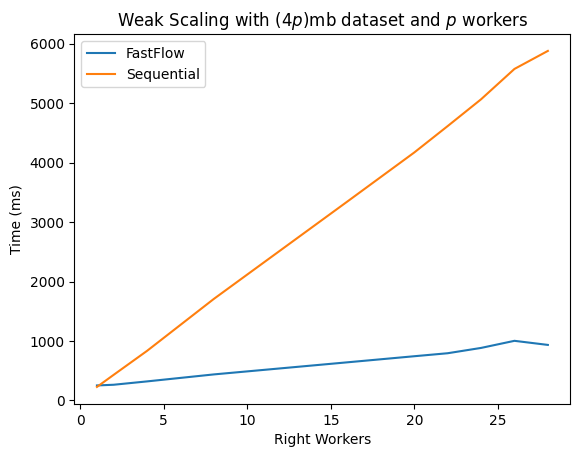

In [ ]:
# plot both the sequential and fastflow compression times for the weak scaling experiment
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Extract sizes and times for FastFlow and Sequential
ws, times_ff = zip(*average_compression_results_weak)
ws, times_seq = zip(*average_comp_seq_weak)

# Plot FastFlow and Sequential results
ax.plot(ws, times_ff, label='FastFlow')
ax.plot(ws, times_seq, label='Sequential')

ax.legend()

ax.set_xlabel("Right Workers")
ax.set_ylabel("Time (ms)")
ax.set_title("Weak Scaling with ($4p$)mb dataset and $p$ workers")

plt.show()




In [ ]:
# calculate speedup, scalability and efficiency for the weak scaling experiment. for sequential time also scales with the number of workers.
speedup = []
scalability = []
efficiency = []

for i in range(len(average_compression_results_weak)):
    speedup.append(average_comp_seq_weak[i][1] / average_compression_results_weak[i][1])
    efficiency.append(average_comp_seq_weak[i][1] / average_compression_results_weak[i][1] / average_compression_results_weak[i][0])


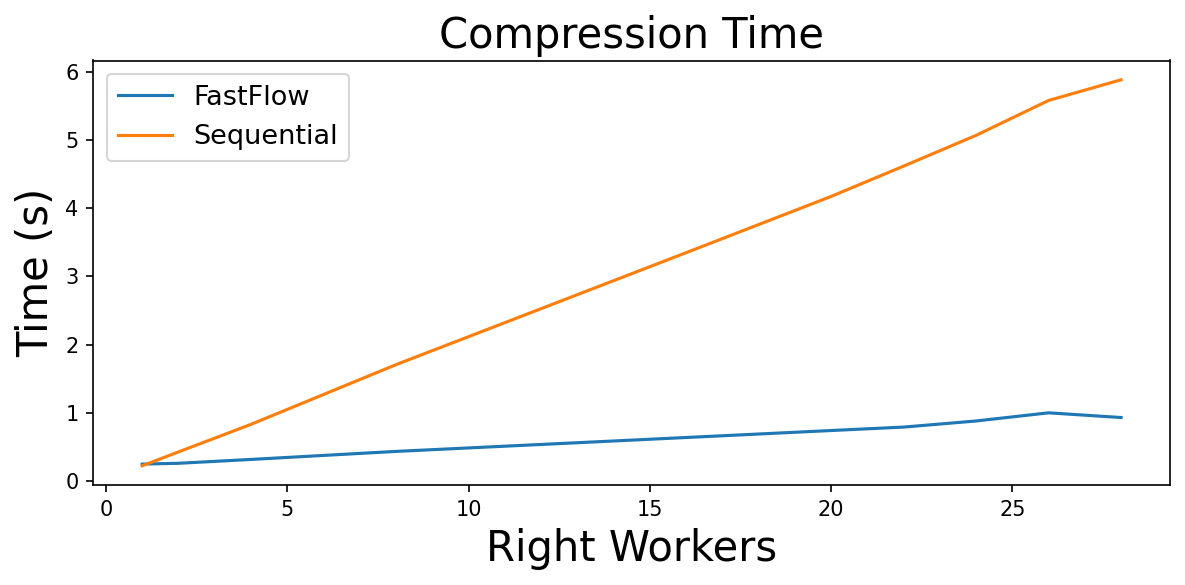

In [ ]:
import matplotlib.pyplot as plt

# Assuming compression_results are defined

# First figure for Compression Time
fig1 = plt.figure(figsize=(8, 4), dpi=150)
ax1 = fig1.add_subplot(1, 1, 1)
ax1.set_title("Compression Time", fontsize=20)
ax1.set_xlabel("Right Workers", fontsize=20)
ax1.set_ylabel("Time (s)", fontsize=20)  # Changed to seconds

ws, times_ff = zip(*average_compression_results_weak)
ws, times_seq = zip(*average_comp_seq_weak)

times_ff = [t / 1000 for t in times_ff]  # Convert milliseconds to seconds
times_seq = [t / 1000 for t in times_seq]  # Convert milliseconds to seconds

ax1.plot(ws, times_ff, label='FastFlow')
ax1.plot(ws, times_seq, label='Sequential')

ax1.legend(fontsize=13)

plt.tight_layout()
plt.show()

# Save this figure
fig1.savefig('compression_time_plot.png')


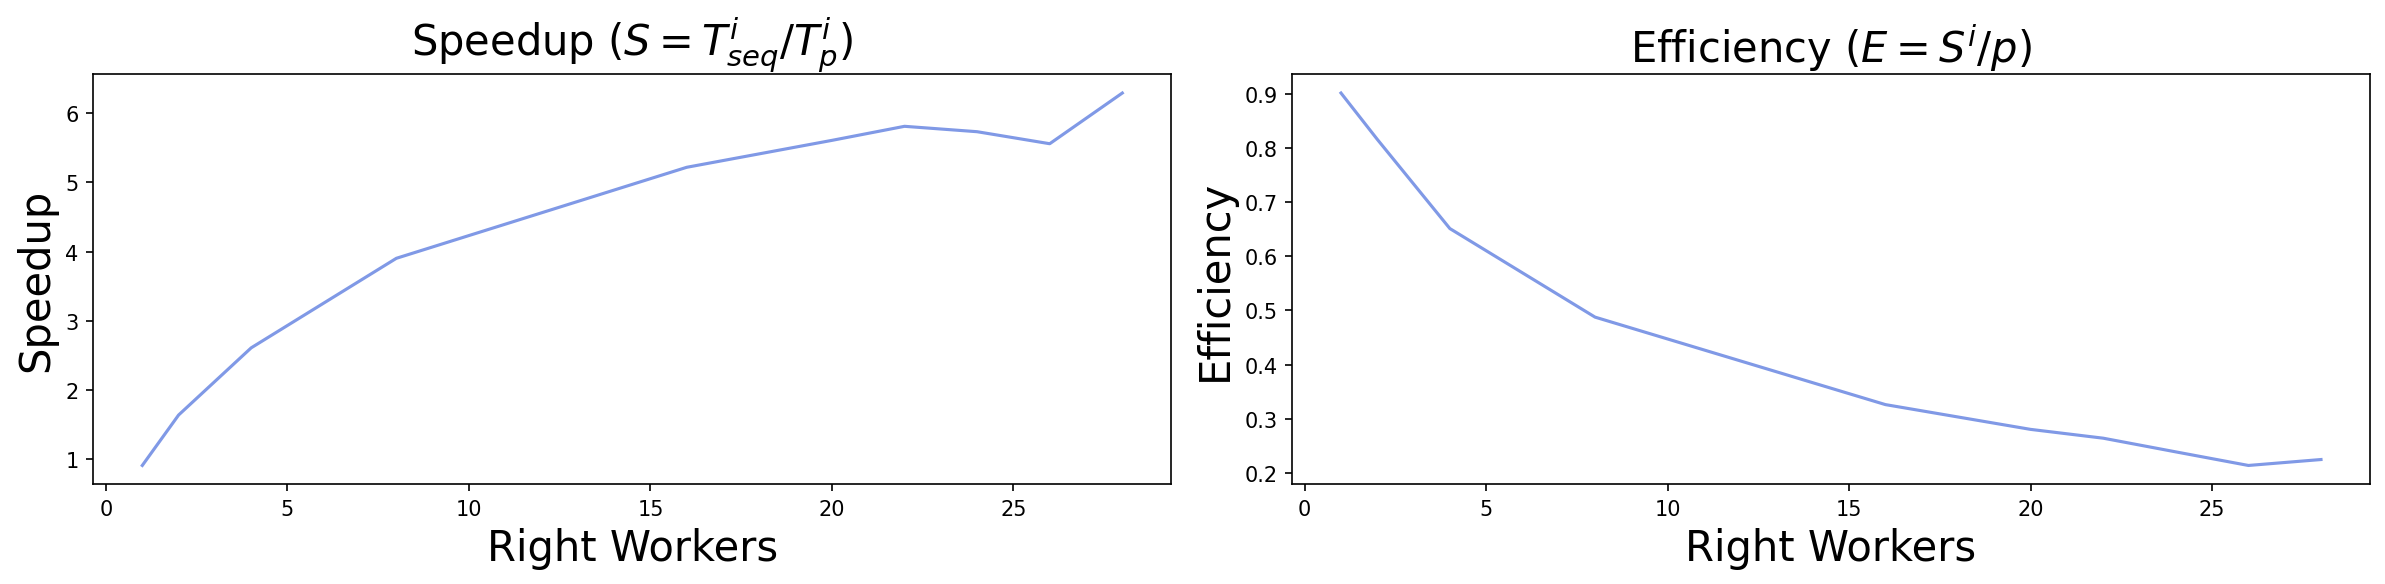

In [ ]:
import matplotlib.pyplot as plt

# Assuming speedup, efficiency, and base_color are defined

# Second figure for Speedup and Efficiency
fig2 = plt.figure(figsize=(16, 4), dpi=150)
gs = fig2.add_gridspec(1, 2)

# Speedup plot
ax2 = fig2.add_subplot(gs[0, 0])
ax2.set_title("Speedup ($S = T_{seq}^i / T_p^i$)", fontsize=20)
ax2.set_xlabel("Right Workers", fontsize=20)
ax2.set_ylabel("Speedup", fontsize=20)

ax2.plot(ws, speedup, color=base_color)

# Efficiency plot
ax3 = fig2.add_subplot(gs[0, 1])
ax3.set_title("Efficiency ($E = S^i / p$)", fontsize=20)
ax3.set_xlabel("Right Workers", fontsize=20)
ax3.set_ylabel("Efficiency", fontsize=20)

ax3.plot(ws, efficiency, color=base_color)

plt.tight_layout()
plt.show()

# Save this figure
fig2.savefig('speedup_efficiency_plot.png')
